In [2]:
from skimage.util.shape import view_as_windows
import numpy as np
import scipy
# import scipy.linalg as linalg # SciPy Linear Algebra Library
import pandas as pd
import matplotlib.pyplot as plt

"""
for function, reference to:https://stackoverflow.com/questions/52463972/...
generating-banded-matrices-using-numpy#:~:text=def%20sliding_windows_vw...
(a%2C%20W)%3A%0A%20%20%20%20a%20%3D%20np.asarray(a)%0A%20%20%20%20p%20%3D%...
20np.zeros(W%2D1%2Cdtype%3Da.dtype)%0A%20%20%20%20b%20%3D%20np.concatenate((...
p%2Ca%2Cp))%0A%20%20%20%20return%20view_as_windows(b%2Clen(a)%2BW%2D1)%5B%3A%3A%2D1%5D
"""
def sliding_windows_vw(a, W):
    a = np.asarray(a)
    p = np.zeros(W,dtype=a.dtype)
    b = np.concatenate((p,a,p))
    return view_as_windows(b,len(a)+W-1)[::-1]

def generate_3_band_matrix(a,b,c,W):
    arr = [a,b,c]    
    return sliding_windows_vw(arr, W)
    
def is_pos_def(x):
    cond = np.all(np.linalg.eigvals(x) > 0)
    if cond:
        print("The matrix is positive definite")
    return cond

def matplot_sparse_matrix(L, title, cmap_name =plt.cm.PiYG):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.matshow(L, cmap=cmap_name)
    plt.title(title)

class Toeplitz:
    def __init__(self,a,b,c, N):
        self.n = N
        self.A = generate_3_band_matrix(a,b,c, (self.n - 2))
        self.a = np.abs(a)
        self.b = np.abs(b)
        self.c = np.abs(c)
     

In [3]:
hw6 = Toeplitz(-1,2,-1,20)
b = np.linspace(0.1, 2.0, 20)
X = np.linalg.inv(hw6.A).dot(b)
df = pd.DataFrame(list(X), index =['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20'],
                                              columns =['True Values'])
true_sol = list(X)
x_initial = np.ones(20)

print("A matrix is the following:")
print(hw6.A)
print("b vector is the following:")
print(b)
print("Initial values for Steepest Descent is the following:")
print(x_initial)

A matrix is the following:
[[ 2 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [-1  2 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 -1  2 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 -1  2 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 -1  2 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 -1  2 -1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 -1  2 -1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 -1  2 -1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 -1  2 -1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 -1  2 -1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 -1  2 -1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 -1  2 -1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 -1  2 -1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 -1  2 -1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1  2 -1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0

In [3]:
from numpy import linalg as LA
# Reference: https://sophiamyang.github.io/DS/optimization/descentmethod2/descentmethod2.html
def steepest_descent(A, b, x):
    """
    Solve Ax = b
    Parameter x: initial values
    """
    if (is_pos_def(A) == False) | (A != A.T).any():
        raise ValueError('Matrix A needs to be symmetric positive definite (SPD)')
    r = b - A @ x
    k = 0
    while LA.norm(r) > 1e-10 :
        p = r
        q = A @ p
        alpha = (p @ r) / (p @ q)
        x = x + alpha * p
        r = r - alpha * q
        k =+ 1

    return x

def conjugate_gradient(A, b, x):
    if (is_pos_def(A) == False) | (A != A.T).any():
        raise ValueError('Matrix A needs to be symmetric positive definite (SPD)')
    r = b 
    k = 0
    # x = np.zeros(A.shape[-1])
    while LA.norm(r) > 1e-10 :
        if k == 0:
            p = r
        else: 
            gamma = - (p @ A @ r)/(p @ A @ p)
            p = r + gamma * p
        alpha = (p @ r) / (p @ A @ p)
        x = x + alpha * p
        r = r - alpha * (A @ p)
        k =+ 1
    return x

In [4]:
%%time
steepest_descent(hw6.A, b, x_initial)

The matrix is positive definite
CPU times: user 54.2 ms, sys: 4.54 ms, total: 58.7 ms
Wall time: 47.8 ms


array([ 7.33333333, 14.56666667, 21.6       , 28.33333333, 34.66666667,
       40.5       , 45.73333333, 50.26666667, 54.        , 56.83333333,
       58.66666667, 59.4       , 58.93333333, 57.16666667, 54.        ,
       49.33333333, 43.06666667, 35.1       , 25.33333333, 13.66666667])

In [5]:
%%time
conjugate_gradient(hw6.A, b,x_initial)

The matrix is positive definite
CPU times: user 1.45 ms, sys: 126 µs, total: 1.57 ms
Wall time: 1.26 ms


array([ 8.33333333, 15.56666667, 22.6       , 29.33333333, 35.66666667,
       41.5       , 46.73333333, 51.26666667, 55.        , 57.83333333,
       59.66666667, 60.4       , 59.93333333, 58.16666667, 55.        ,
       50.33333333, 44.06666667, 36.1       , 26.33333333, 14.66666667])

In [6]:
import numpy as np
import holoviews as hv
# hv.extension('plotly')

def steepest_descent_store_result(A, b, x, true_sol):
    x_steps = [x]
    y_steps = [0.5 * x @ A @ x - x @ b]
    err_steps = []
    
    if (is_pos_def(A) == False) | (A != A.T).any():
        raise ValueError('Matrix A needs to be symmetric positive definite (SPD)')
    r = b - A @ x
    k = 0
    while LA.norm(r) > 1e-10 :
        p = r
        q = A @ p
        alpha = (p @ r) / (p @ q)
        x = x + alpha * p
        r = r - alpha * q
        k =+ 1
        x_steps.append(x)
        y_steps.append(0.5 * x @ A @ x - x @ b)
        err_steps.append(np.linalg.norm(x - true_sol))

    return x, x_steps, y_steps, err_steps

def conjugate_gradient_store_result(A, b, x,true_sol):
    if (is_pos_def(A) == False) | (A != A.T).any():
        raise ValueError('Matrix A needs to be symmetric positive definite (SPD)')
    r = b 
    k = 0
    # x = np.zeros(A.shape[-1])
    x_steps = [x]
    y_steps = [0.5 * x @ A @ x - x @ b]
    err_steps = []
    while LA.norm(r) > 1e-10 :
        if k == 0:
            p = r
        else: 
            gamma = - (p @ A @ r)/(p @ A @ p)
            p = r + gamma * p
        alpha = (p @ r) / (p @ A @ p)
        x = x + alpha * p
        r = r - alpha * (A @ p)
        k =+ 1
        x_steps.append(x)
        y_steps.append(0.5 * x @ A @ x - x @ b)
        err_steps.append(np.linalg.norm(x - true_sol))

    return x, x_steps, y_steps, err_steps

The matrix is positive definite


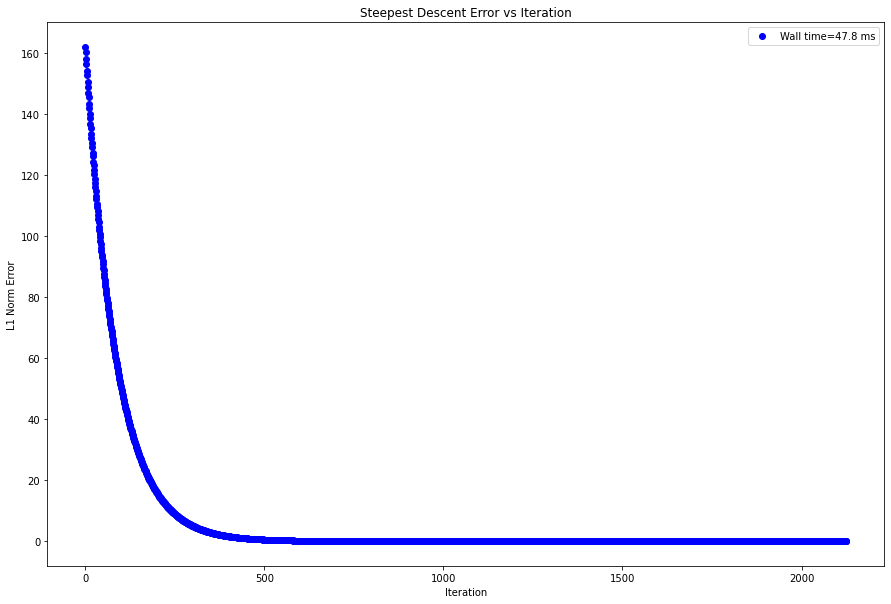

In [10]:
# visualize steepest descent method
x, x_steps, y_steps, err_steepest = steepest_descent_store_result(hw6.A, b, x_initial, true_sol)
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(err_steepest, 'bo', label= "Wall time=47.8 ms")
plt.title("Steepest Descent Error vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("L1 Norm Error")
plt.legend()
plt.savefig("only_steepest.png")

The matrix is positive definite


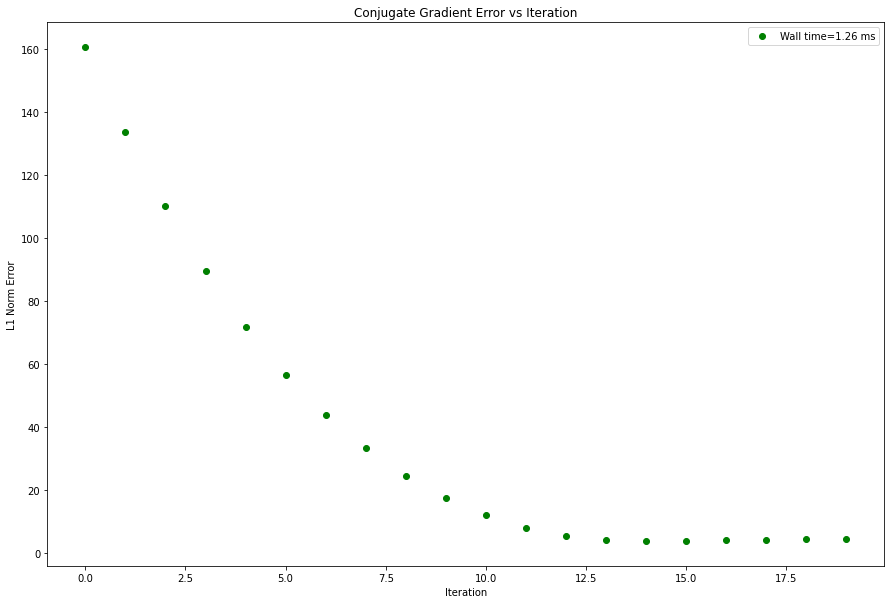

In [11]:
x, x_steps, y_steps, err_cg = conjugate_gradient_store_result(hw6.A, b, x_initial,true_sol)
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(err_cg, 'go', label= "Wall time=1.26 ms")
plt.title("Conjugate Gradient Error vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("L1 Norm Error")
plt.legend()
plt.savefig("only_cg.png")

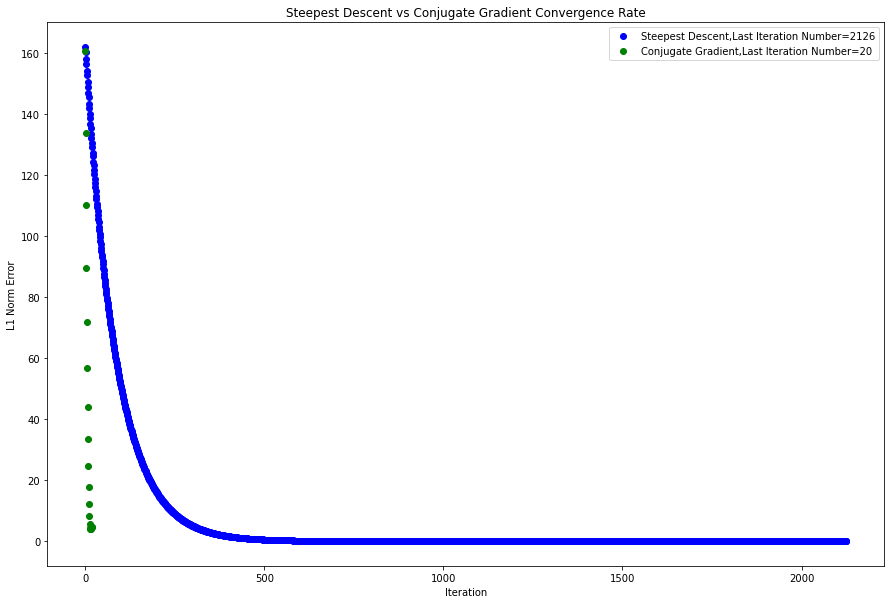

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(err_steepest,'bo', label = "Steepest Descent,Last Iteration Number="+str(len(err_steepest)))
plt.plot(err_cg, 'go', label= "Conjugate Gradient,Last Iteration Number="+str(len(err_cg)))
plt.title("Steepest Descent vs Conjugate Gradient Convergence Rate")
plt.xlabel("Iteration")
plt.ylabel("L1 Norm Error")
plt.legend()
plt.savefig("comparison.png")